# Housing price prediction using ML

## Import required library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Load dataset 

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()

In [4]:
print('Input data: ', data.data.shape)
print('Target data: ', data.target.shape)
print('Input feature names: ', data.feature_names)
print('Target names: ', data.target_names)

Input data:  (20640, 8)
Target data:  (20640,)
Input feature names:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target names:  ['MedHouseVal']


#### Convert to pandas dataframe

In [5]:
data_df = pd.DataFrame(data=np.concatenate((data['data'], \
                                            np.array(data['target']).reshape(-1,1)), axis=1), \
                                                columns=data.feature_names + data.target_names)

In [6]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Check the loaded dataset

In [7]:
print(f'Data Head \n {data_df.head()} \n Data Tail \n {data_df.tail()}')

Data Head 
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422   
 Data Tail 
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.32

## Data Analysis

### Data information and description

In [8]:
print(f'Data information \n {data_df.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Data information 
 None


In [9]:
print(f'Data description \n {data_df.describe()}')

Data description 
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.

### Plot the original data

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

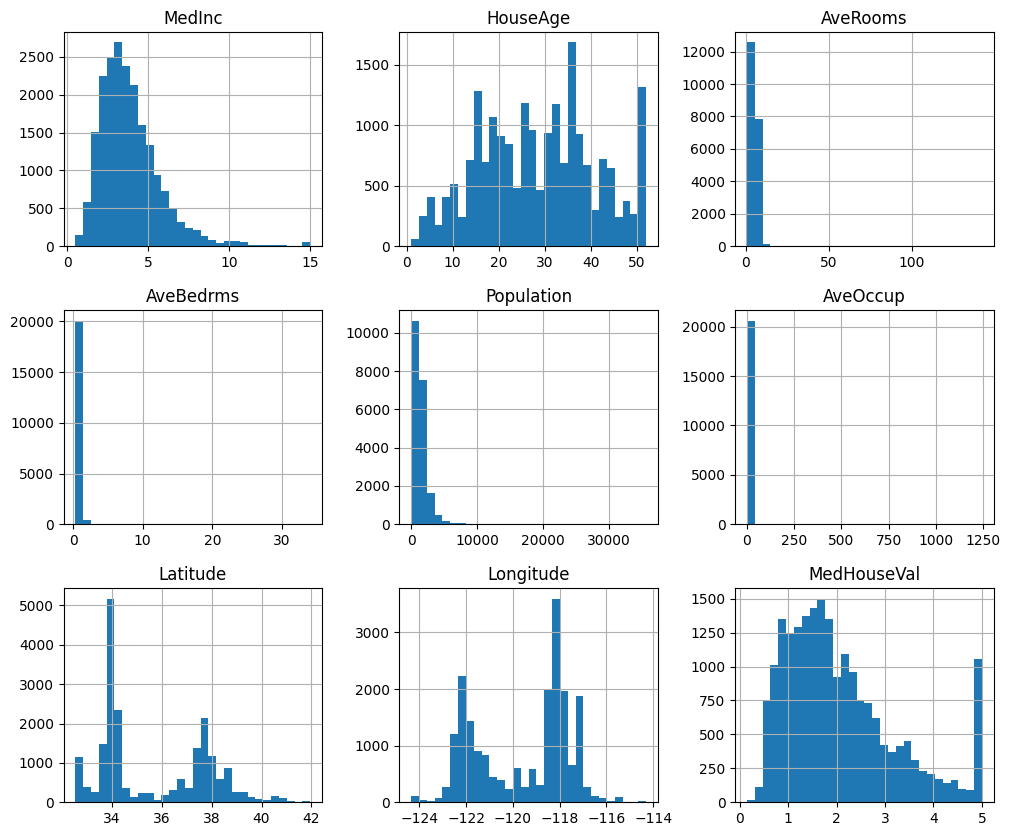

In [10]:
data_df.hist(figsize=(12,10), bins=30)

## Data Preprocessing

### Check for null/NaN value

In [11]:
print('Is there any null/NaN?\n', data_df.isna().any())

Is there any null/NaN?
 MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool


### Normalize the data

In [12]:
from sklearn import preprocessing

In [13]:
std_scaler = preprocessing.StandardScaler()


In [14]:
minmax_scaler = preprocessing.MinMaxScaler()

In [15]:
arr = std_scaler.fit_transform(data_df)

In [16]:
arr.shape

(20640, 9)

In [17]:
data_df_std = std_scaler.fit_transform(data_df)
data_df_std = pd.DataFrame(data_df_std)

print(data_df_std.describe())

                  0             1             2             3             4  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   6.609700e-17  5.508083e-18  6.609700e-17 -1.060306e-16 -1.101617e-17   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.774299e+00 -2.196180e+00 -1.852319e+00 -1.610768e+00 -1.256123e+00   
25%   -6.881186e-01 -8.453931e-01 -3.994496e-01 -1.911716e-01 -5.638089e-01   
50%   -1.767951e-01  2.864572e-02 -8.078489e-02 -1.010650e-01 -2.291318e-01   
75%    4.593063e-01  6.643103e-01  2.519615e-01  6.015869e-03  2.644949e-01   
max    5.858286e+00  1.856182e+00  5.516324e+01  6.957171e+01  3.025033e+01   

                  5             6             7             8  
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  
mean   3.442552e-18 -1.079584e-15 -8.526513e-15  2.037991e-16  
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  
min   -2.290000e-01 -1.447568e+0

In [18]:
data_df_minmax = minmax_scaler.fit_transform(data_df)
data_df_minmax = pd.DataFrame(data_df_minmax)

print(data_df_minmax.describe())

                  0             1             2             3             4  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       0.232464      0.541951      0.032488      0.022629      0.039869   
std        0.131020      0.246776      0.017539      0.014049      0.031740   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.142308      0.333333      0.025482      0.019943      0.021974   
50%        0.209301      0.549020      0.031071      0.021209      0.032596   
75%        0.292641      0.705882      0.036907      0.022713      0.048264   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       0.001914      0.328572      0.476125      0.395579  
std        0.008358      0.226988      0.199555      0.237928  
min        0.000000      0.00000

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>]], dtype=object)

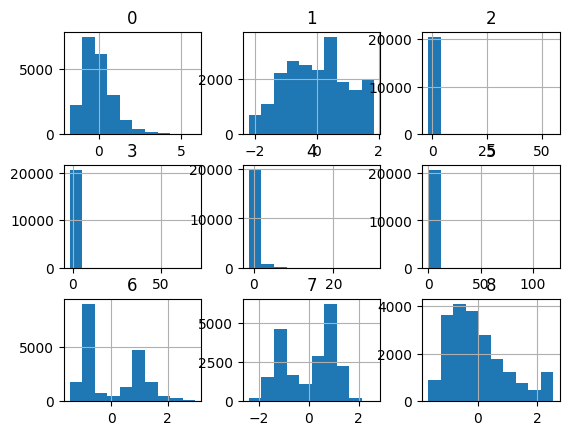

In [21]:
data_df_std.hist()

### Feature Selection

In [22]:
from sklearn.feature_selection import r_regression

In [23]:
data_df_std.iloc[:,:8].shape

(20640, 8)

In [24]:
selector = r_regression(data_df_std.iloc[:,:8], data_df_std.iloc[:,8])
print(selector)

[ 0.68807521  0.10562341  0.15194829 -0.04670051 -0.02464968 -0.02373741
 -0.14416028 -0.04596662]


In [25]:
good_feature_idx = list(i for i, e in enumerate(selector) if e > 0.1)

In [26]:
data_ok = data_df_std.iloc[:,:3]
data_ok.describe()

,0,1,2
count,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17
std,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01
50%,-1.767951e-01,2.864572e-02,-8.078489e-02
75%,4.593063e-01,6.643103e-01,2.519615e-01
max,5.858286e+00,1.856182e+00,5.516324e+01


### Split the dataset

In [27]:
from sklearn.model_selection import train_test_split

#### Split into training and testing

In [28]:
train_length = 0.8
test_length = 0.2

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_ok, data_df_std.iloc[:,8], test_size=test_length, train_size=train_length, shuffle=False)

print('Input train shape: ', X_train.shape)
print('Target train shape: ', y_train.shape)
print('Input test shape', X_test.shape)
print('Target test shape', y_test.shape)

Input train shape:  (16512, 3)
Target train shape:  (16512,)
Input test shape (4128, 3)
Target test shape (4128,)


## Build the models

### Linear regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
pred_result_lr = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
mse_loss = mean_squared_error(y_test, pred_result_lr)
r2_loss = r2_score(y_test, pred_result_lr)

print('MSE loss: ', mse_loss)
print('R2 loss', r2_loss)

MSE loss:  0.49488121798091833
R2 loss 0.5477779395650311


### Multi-Layer Perceptron

In [39]:
from sklearn.neural_network import MLPRegressor

In [40]:
model = MLPRegressor(hidden_layer_sizes=3, activation='relu', max_iter=2000)

In [41]:
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=3, max_iter=2000)

In [42]:
pred_result_mlp = model.predict(X_test)

In [44]:
mse_loss = mean_squared_error(y_test, pred_result_mlp)
r2_loss = r2_score(y_test, pred_result_mlp)

print('MSE loss: ', mse_loss)
print('R2 loss', r2_loss)

MSE loss:  0.47285706474926636
R2 loss 0.5679035931398191


#### Prediction plot

In [ ]:
# y_test = y_test.reset_index

In [ ]:
y_test

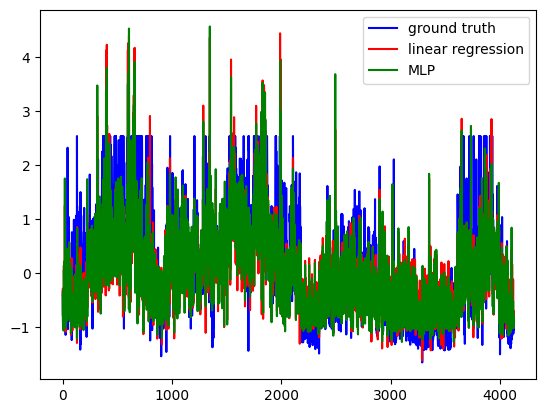

In [45]:
plt.plot(y_test.to_numpy(), "-b", label="ground truth")
plt.plot(pred_result_lr, "-r", label="linear regression")
plt.plot(pred_result_mlp, "-g", label="MLP")
plt.legend(loc="upper right")
plt.show()